In [324]:
import random
import struct
import math
from collections import *
from __future__ import division
import matplotlib.pyplot as plt

%matplotlib inline

Solution = namedtuple('Solution', 'chromosome fitness')
GenerationStats = namedtuple('GenerationStats', 'number fitness bestGeneration bestEver')

In [306]:
class GA:
    def __init__(self, popSize, mutRate, crossoverRate, maxGenerations, numElites, chromosomeFactory, fitness, stopCondition):
        assert numElites < popSize
        
        self.popSize = popSize
        self.mutRate = mutRate
        self.crossoverRate = crossoverRate
        self.maxGenerations = maxGenerations
        self.numElites = numElites
        self.chromosomeFactory = chromosomeFactory
        self.fitness = fitness
        self.stopCondition = stopCondition
        self.population = None
        self.generation = 0
        self.bestSolutionSoFar = None
        self.currentBestSolution = None
        self.populationFitness = None
        self.stats = []
    
    def __str__(self):
        return '\t'.join(
            [str(x) for x in 
             [self.popSize, self.bestSolutionSoFar, self.currentBestSolution, self.generation]
            ]
        )
    
    def populate(self):
        chromosomes = [self.chromosomeFactory() for x in range(self.popSize)]
        self.population = [Solution(x, self.fitness(x)) for x in chromosomes]
        self.updateStats()
        
    def run(self):
        if not self.population:
            self.populate()
        
        for self.generation in range(1, self.maxGenerations+1):
            if self.stopCondition(self.population):
                break
            
            newPopulation = self.population[:self.numElites]
            
            while len(newPopulation) < self.popSize:
                x, y = self.select(), self.select()
                
                newChromosomes = x.crossover(y)
                
                # print x, y, newChromosomes
                
                for c in newChromosomes:
                    if random.random() < self.mutRate:
                        c.mutate()
                    
                newPopulation.extend([Solution(c, self.fitness(c)) for c in newChromosomes])
            
            self.population = newPopulation
            
            self.updateStats()
    
    def updateStats(self):
        self.population.sort(key = lambda x: x.fitness, reverse = True)
        self.currentBestSolution = self.population[0]
        
        self.populationFitness = sum([x.fitness for x in self.population])
        avg = self.populationFitness / len(self.population)
        
        if not self.bestSolutionSoFar or self.currentBestSolution.fitness > self.bestSolutionSoFar.fitness:
            self.bestSolutionSoFar = self.currentBestSolution
        
        self.stats.append(GenerationStats(self.generation,
                                          avg,
                                          self.currentBestSolution,
                                          self.bestSolutionSoFar))
    
    def select(self):
        x = random.uniform(0, self.populationFitness)
        acc = 0
        
        for i in range(len(self.population)):
            acc += self.population[i].fitness
            if x < acc:
                break

        return self.population[i].chromosome
    
    def plot(self):
        plt.figure(figsize=(6, 6))
        gens = [g.number for g in self.stats]
        fitness = [g.fitness for g in self.stats]
        plt.plot(gens, fitness)
        plt.xlabel('Generation')
        plt.ylabel('Average fitness')
        plt.title('Average fitness across time')
        plt.show()
        
    def printStats(self, delta = 1):
        print 'Generation\tAvg fitness\tBest here\tBest ever'
        for x in xrange(0, len(self.stats), delta):
            print '\t'.join(map(str, self.stats[x]._asdict().values()))

In [307]:
class Chromosome:
    def __init__(self, length = 20, genome = None):
        if not genome:
            genome = "".join([random.choice("01") for x in range(length)])
        
        self.genome = genome
    
    def crossover(self, c):
        crossover_point = random.randint(0, len(self.genome))
        
        x = self.genome[:crossover_point] + c.genome[crossover_point:]
        y = c.genome[:crossover_point] + self.genome[crossover_point:]
        
        return [Chromosome(genome = x), Chromosome(genome = y)]
    
    def mutate(self):
        genome = list(self.genome)
        
        changes = random.sample(range(len(self.genome)), 3)
        
        for x in changes:
            genome[x] = '0' if genome[x] == '1' else '0'
            
        self.genome = ''.join(genome)
    
    def __str__(self):
        return self.genome
    
    def __repr__(self):
        return self.genome

In [308]:
def zipWith(f, a, b):
    return map(f, zip(a,b))

<div class="alert alert-info">
**Ejercicio** Ejecuta un algoritmo genético, que trate de generar una cadena de longitud `8`, solucion = `11001100`. ¿Cuántas generaciones tardó? Muestra el avance cada `10` generaciones.
</div>

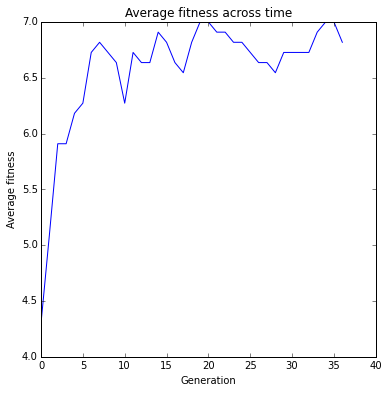

Generation	Avg fitness	Best here	Best ever
0	4.3	Solution(chromosome=01101100, fitness=6)	Solution(chromosome=01101100, fitness=6)
1	5.09090909091	Solution(chromosome=01101100, fitness=6)	Solution(chromosome=01101100, fitness=6)
2	5.90909090909	Solution(chromosome=01101100, fitness=6)	Solution(chromosome=01101100, fitness=6)
3	5.90909090909	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
4	6.18181818182	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
5	6.27272727273	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
6	6.72727272727	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
7	6.81818181818	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
8	6.72727272727	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100, fitness=7)
9	6.63636363636	Solution(chromosome=10001100, fitness=7)	Solution(chromosome=10001100

In [309]:
eightbitGA   =  GA(10,
                   .2,
                   None,
                   100,
                   5,
                   lambda: Chromosome(length = 8),
                   lambda x: sum(zipWith(lambda (a,b): a == b, x.genome, '11001100')),
                   lambda x: x[0].fitness == 8
                   )
eightbitGA.run()
eightbitGA.plot()
eightbitGA.printStats()

<div class="alert alert-info">
**Ejercicio** Ejecuta un algoritmo genético, que trate de generar una matriz de `12` $\times$ `12` que tenga una cruz enmedio (como la bandera de Suiza). ¿Cuántas generaciones tardó? Muestra el avance cada `20` generaciones.
</div>

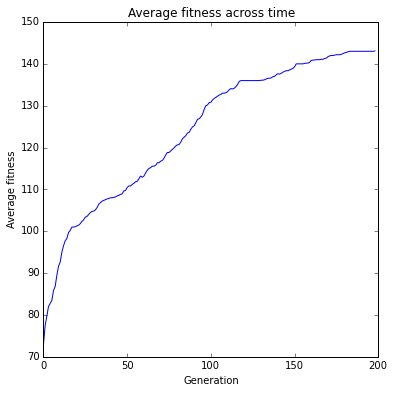

Generation	Avg fitness	Best here	Best ever
0	72.8	Solution(chromosome=010001000101111110010001011101101010110000111000101000011001001000111000000111101100010001100010110101100100110001100111001000000110000100000011, fitness=83)	Solution(chromosome=010001000101111110010001011101101010110000111000101000011001001000111000000111101100010001100010110101100100110001100111001000000110000100000011, fitness=83)
20	101.272727273	Solution(chromosome=000001100011000101110000100010001111101001010000110000010010100000000100101000011000001100010000000000000000100011000111001000000110000000000011, fitness=102)	Solution(chromosome=000001100011000101110000100010001111101001010000110000010010100000000100101000011000001100010000000000000000100011000111001000000110000000000011, fitness=102)
40	108.0	Solution(chromosome=000001100011000001110000100010000111100001010000010000110010000000000100101000011000001100000000000000000000100001100111001000000010000100000001, fitness=108)	Solution(chromosome=00000110001

In [310]:
flag = '0' * (12*12) # Hacer el array de la bandera era demasiado trabajo.
                     # Un array de puros 0 funciona exactamente igual :|
switzerlandGA = GA(10,
                   .2,
                   None,
                   1000,
                   5,
                   lambda: Chromosome(length = 12*12),
                   lambda x: sum(zipWith(lambda (a,b): a == b, x.genome, flag)),
                   lambda x: x[0].fitness == 12*12
                   )
switzerlandGA.run()
switzerlandGA.plot()
switzerlandGA.printStats(20)

<div class="alert alert-info">
**Ejercicio** Ejecuta un algoritmo genético, que encuentre el mínimo de $f(x) = x^2 + 2$.
</div>

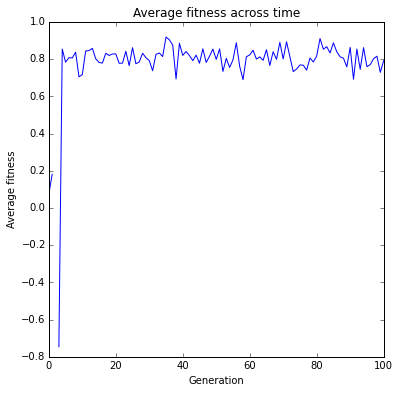

Generation	Avg fitness	Best here	Best ever
0	0.07596938544	Solution(chromosome=01101011110110010001000010100000, fitness=0.9999320772930486)	Solution(chromosome=01101011110110010001000010100000, fitness=0.9999320772930486)
10	0.717417155582	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)
20	0.828292535696	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)
30	0.792171069049	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)
40	0.820512009415	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)	Solution(chromosome=11101101101100111011000100110111, fitness=0.999991059474581)
50	0.798941270432	Solution(chromosome=1110110110110011101

In [339]:
def f(x):
    return math.sin(x) # Estaba más emocionante que x*x + 2. Jala si lo cambias, como quiera.
def from_bits(x):
    # Truco chacalero que toma un string de 32 bits y lo vuelve un float.
    return struct.unpack('>f', struct.pack('>L', long(x, 2)))[0]

minimizeGA   =  GA(100,
                   .2,
                   None,
                   100,
                   5,
                   lambda: Chromosome(length = 32),   # como un float
                   lambda x: -f(from_bits(x.genome)), # Maximizar el fitness <=> minimizas f
                   lambda x: False                    # No hay end condition
                   )
minimizeGA.run()
minimizeGA.plot()
minimizeGA.printStats(10)
print 'Best solution: ', from_bits(minimizeGA.bestSolutionSoFar.chromosome.genome)